# Ciencia de datos aplicada (ITBA): Modelo de segundo entregable

**Equipo:** Estudiante_1, Estudiante_2

**Nombre del proyecto**: Nombre definido para el proyecto en *Entregable 1*

### 🧾 1. Importación y carga de librerías

In [ ]:
!pip install ucimlrepo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuraciones de estilo
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

### 🧾 2. Carga de datos

En este caso utilizamos un dataset que aparece en el Repositorio UCI a modo de ejemplo.

In [ ]:
import pandas as pd

df = pd.read_csv('dataset/Reservas.csv', sep=';')

# Eliminamos columnas no necesarias
df_cleaned = df.drop(columns=['Email', 'Dni', 'Telefono', 'uuid', 'Cliente', 'Proveedor de carro', 'Origen', 'Patente', 'Anifitrion', 'Celular', 'Iva', 'Observaciones', 'Pago Anfitrion', 'Condicion'])

# Filtramos fechas posteriores al 01/12/2024
df_cleaned['Fecha de creacion'] = pd.to_datetime(df_cleaned['Fecha de creacion'], errors='coerce')
fecha_limite = pd.to_datetime('2024-12-01')
df_filtered = df_cleaned[df_cleaned['Fecha de creacion'] >= fecha_limite]

# Separar las reservas CANCELADAS
reservas_canceladas = df_filtered[df_filtered['Estado'] == 'CANCELADA']
# Separar las reservas COMPLETADAS
reservas_completadas = df_filtered[df_filtered['Estado'] == 'COMPLETADA']

reservas_canceladas.to_csv('dataset/Reservas_canceladas.csv', sep=';', index=False)
reservas_completadas.to_csv('dataset/Reservas_completadas.csv', sep=';', index=False)

df_filtered.head()

,id,Fecha de creacion,Estado,Ubicacion,Modelo,Nuevo Precio,Precio de la publicacion,Precio de la reserva,Gastos administrativo,Seguro base,...,Devolucion Aeropuerto,Precio final,Pago seña,Pendiente Por Cobrar,Check-in,Check-out,Dias de Alquiler,Pago de garantia,Monto de la garantia,Devolución Garantia
3351,3567,2024-12-01 09:00:51.878981,CANCELADA,"Córdoba, Argentina",Etios,ARS 45.000,ARS 39.000,ARS 78.000,ARS 6.630,ARS 11.000,...,ARS 0,ARS 95.630,ARS 0,ARS 0,20/12/24 9:00,22/12/24 9:00,2,NO,ARS 400.000,NO
3352,3568,2024-12-01 11:55:20.519032,CANCELADA,"Gobernador Duval, Santa Rosa, La Pampa Provinc...",Ranger,ARS 70.000,ARS 70.000,ARS 280.000,ARS 23.800,ARS 22.000,...,ARS 0,ARS 349.400,ARS 0,ARS 0,30/12/24 10:00,2/1/25 12:00,4,NO,ARS 400.000,NO
3353,3569,2024-12-01 12:12:10.362506,CANCELADA,"Gobernador Duval, Santa Rosa, La Pampa Provinc...",Ranger,ARS 70.000,ARS 72.667,ARS 218.000,ARS 18.530,ARS 16.500,...,ARS 0,ARS 253.030,ARS 0,ARS 0,1/12/24 12:11,4/12/24 12:11,3,NO,ARS 400.000,NO
3354,3570,2024-12-01 12:41:15.321837,CANCELADA,"Celedonio Gutiérrez 1287, San Miguel de Tucumá...",Kangoo,ARS 62.000,ARS 62.000,ARS 310.000,ARS 26.350,ARS 27.500,...,ARS 0,ARS 363.850,ARS 0,ARS 0,10/1/25 11:00,14/1/25 16:30,5,NO,ARS 400.000,NO
3355,3571,2024-12-01 14:45:10.681398,CANCELADA,"Vicente López 2305, Buenos Aires, Argentina",Focus,ARS 65.000,ARS 60.000,ARS 60.000,ARS 5.100,ARS 5.500,...,ARS 0,ARS 76.500,ARS 0,ARS 0,11/12/24 19:00,12/12/24 19:00,1,NO,ARS 400.000,NO


### 🗒️ 2. Descripción del dataset
Este dataset contiene 

**Variables numéricas:**
- 

**Variable objetivo:**
- Estado? ya que a partir de aca decidimos que analisis hacer



### 🔍 3. Análisis exploratorio de datos (EDA)

In [16]:
# Información general
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1883 entries, 3351 to 5233
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        1883 non-null   int64         
 1   Fecha de creacion         1883 non-null   datetime64[ns]
 2   Estado                    1883 non-null   object        
 3   Ubicacion                 1883 non-null   object        
 4   Modelo                    1881 non-null   object        
 5   Nuevo Precio              1883 non-null   object        
 6   Precio de la publicacion  1883 non-null   object        
 7   Precio de la reserva      1883 non-null   object        
 8   Gastos administrativo     1883 non-null   object        
 9   Seguro base               1883 non-null   object        
 10  Seguro Contra Terceros    1883 non-null   object        
 11  Seguro Premium            1883 non-null   object        
 12  Entrega Aeropuerto    

In [17]:
# Información general
df_filtered.describe()

,id,Fecha de creacion,Dias de Alquiler
count,1883.000000,1883,1883.000000
mean,4563.535316,2025-01-17 01:26:27.050299392,4.787573
min,3567.000000,2024-12-01 09:00:51.878981,1.000000
25%,4072.500000,2024-12-21 16:29:23.308979968,3.000000
50%,4571.000000,2025-01-05 14:18:59.887024128,4.000000
75%,5056.500000,2025-02-09 13:27:59.455667456,6.000000
max,5544.000000,2025-04-28 11:08:05.013943,34.000000
std,571.573910,NaN,3.654516


In [18]:
# Valores faltantes
df_filtered.isnull().sum()

id                          0
Fecha de creacion           0
Estado                      0
Ubicacion                   0
Modelo                      2
Nuevo Precio                0
Precio de la publicacion    0
Precio de la reserva        0
Gastos administrativo       0
Seguro base                 0
Seguro Contra Terceros      0
Seguro Premium              0
Entrega Aeropuerto          0
Devolucion Aeropuerto       0
Precio final                0
Pago seña                   0
Pendiente Por Cobrar        0
Check-in                    0
Check-out                   0
Dias de Alquiler            0
Pago de garantia            0
Monto de la garantia        0
Devolución Garantia         0
dtype: int64

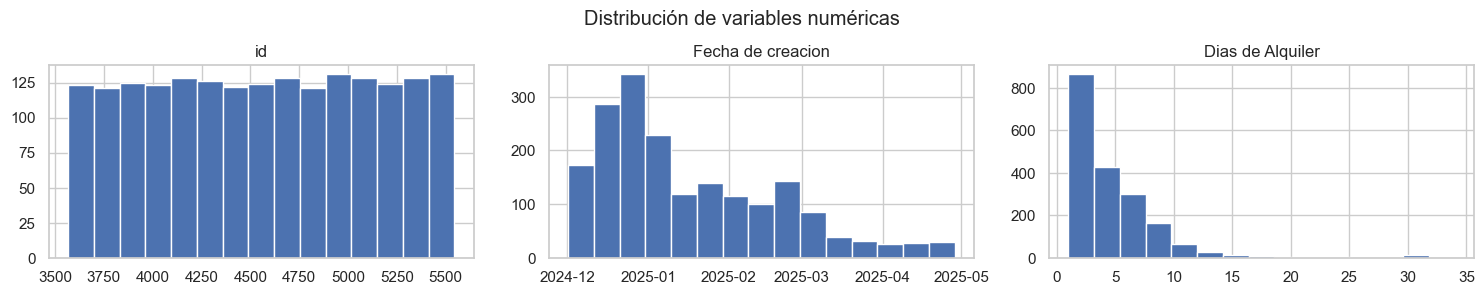

In [20]:
# Distribuciones de variables numéricas
df_filtered.hist(bins=15, figsize=(15, 10), layout=(4, 3))
plt.suptitle('Distribución de variables numéricas')
plt.tight_layout()
plt.show()

#### 🧊 Detección de outliers con boxplots

IndexError: index 2 is out of bounds for axis 0 with size 2

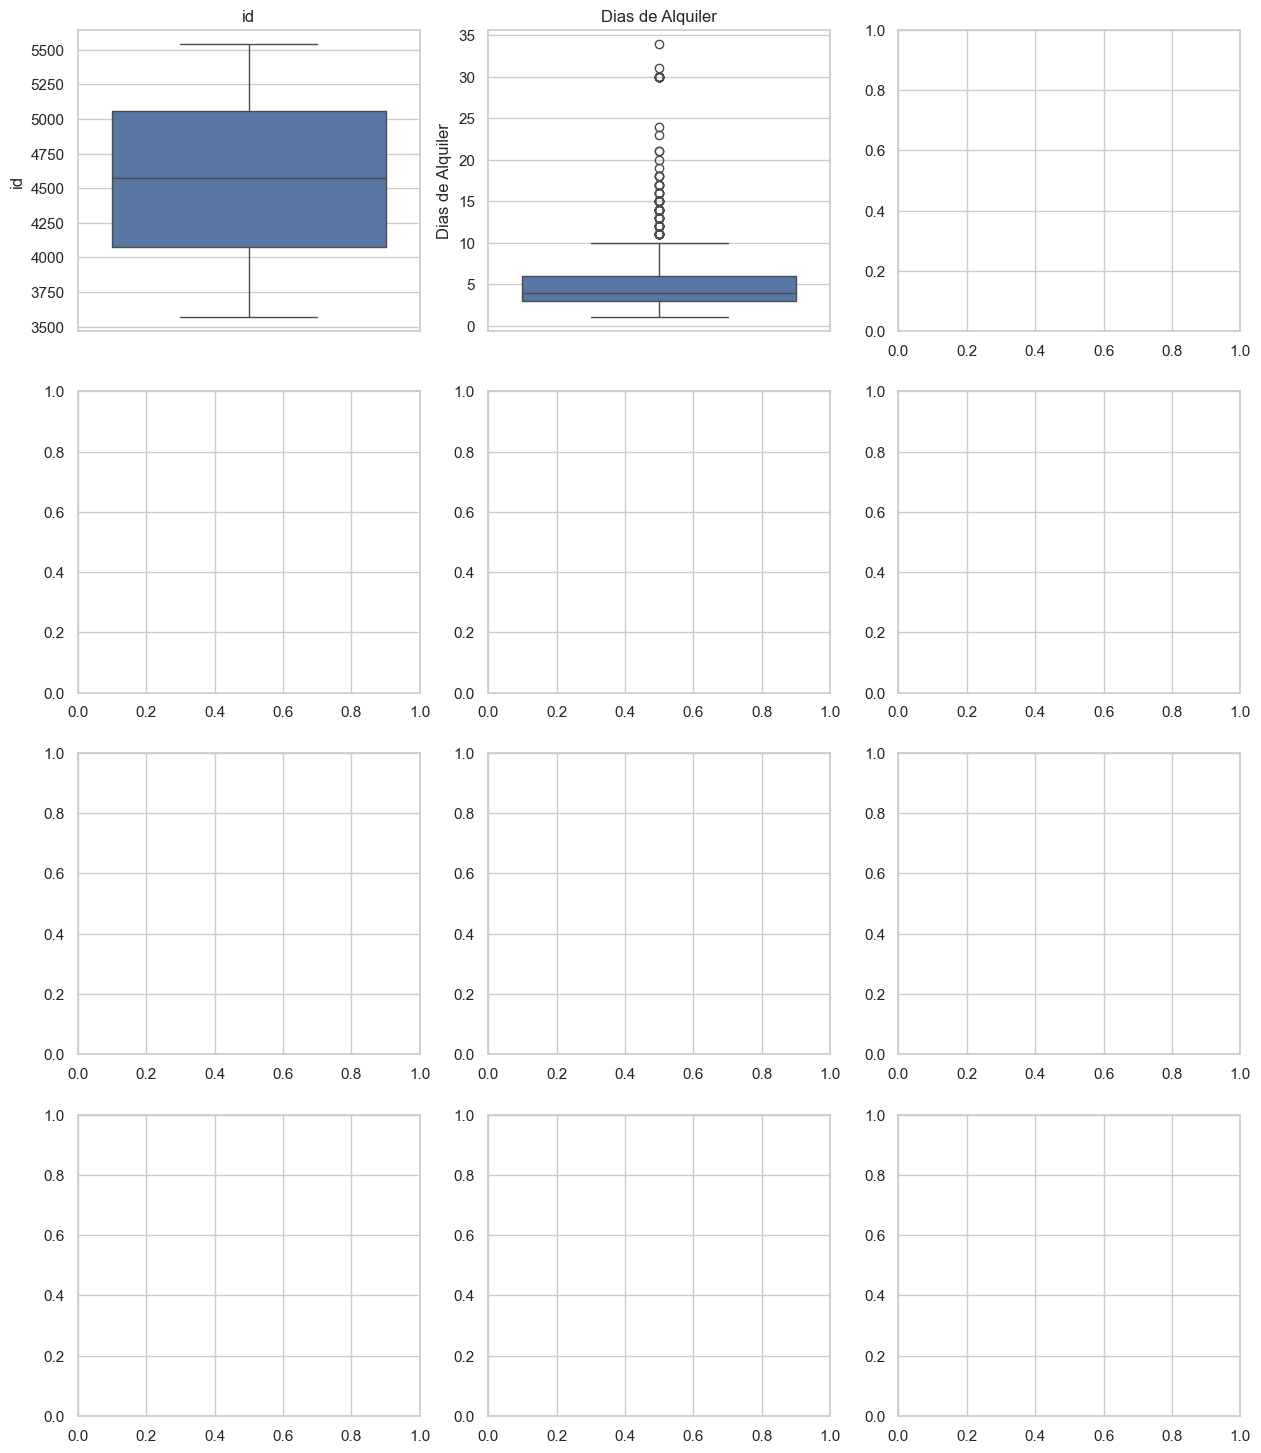

In [21]:
# Boxplots verticales de las 12 variables numéricas (3 por fila)
fig, axes = plt.subplots(4, 3, figsize=(15, 18))

columnas = df_filtered.select_dtypes(include='number').columns

for i, ax in enumerate(axes.flat):
    sns.boxplot(y=df_filtered[columnas[i]], ax=ax)
    ax.set_title(columnas[i])

plt.suptitle('Boxplots de variables numéricas', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### 🔗 Matriz de correlación entre variables numéricas

In [22]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_filtered.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()

ValueError: could not convert string to float: 'CANCELADA'

<Figure size 1200x800 with 0 Axes>

#### 📊 Relación entre variables: ejemplo alcohol vs quality

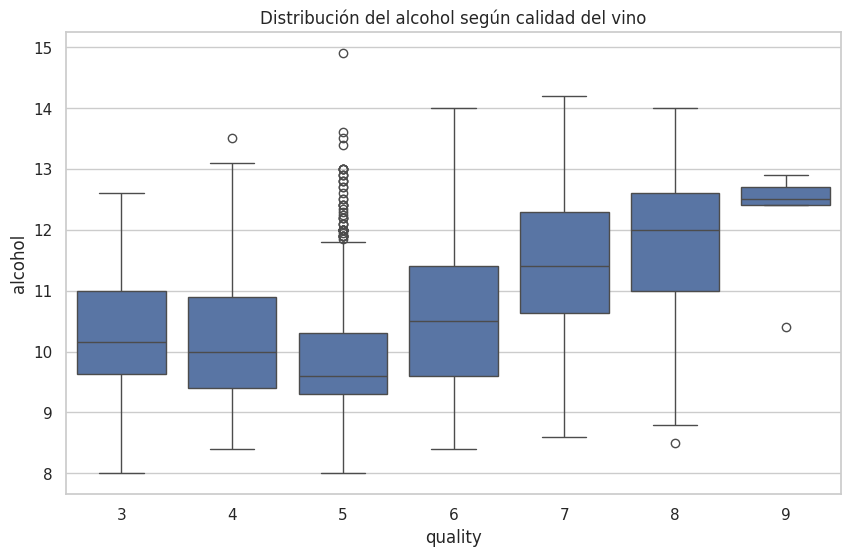

In [ ]:
sns.boxplot(x='quality', y='alcohol', data=df)
plt.title('Distribución del alcohol según calidad del vino')
plt.show()

### 🧼 4. Diagnóstico de calidad de datos
- No se detectaron valores faltantes.
- Algunas variables muestran asimetrías (ej: `residual sugar`, `chlorides`).
- Existen valores atípicos en varias variables.
- Se observa una posible relación positiva entre alcohol y calidad.

### 🧪 5. Transformaciones realizadas

In [ ]:
# Crear variable categórica basada en calidad
df['quality_label'] = df['quality'].apply(lambda x: 'low' if x <= 4 else 'medium' if x <= 6 else 'high')
df['quality_label'] = pd.Categorical(df['quality_label'], categories=['low', 'medium', 'high'])

In [ ]:
# Normalización de variables numéricas (excepto quality)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_cols = df.select_dtypes(include='number').columns.drop('quality')
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [ ]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,5,medium
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,5,medium
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870,5,medium
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870,6,medium
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,5,medium


### ✍️ 6. Reflexión final

Completar
